In [634]:
import collections as col
import itertools as it
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math as ma


Функция для генерирования сетки 

In [635]:
def void_mesh(d1,d2,p,m,R,element_type):
    q = np.array([[0,0],[d1,0],[0,d2],[d1,d2]])
    PD = 2
    NoN = (m+1)*(p+1)*2+(m+1)*(p-1)*2
    NoE = 4*p*m
    NPE = 4
    NL = np.zeros([NoN,PD])
    a = (q[1,0]-q[0,0])/p
    b = (q[2,1]-q[0,1])/p
    
    coor11 = np.zeros([(p+1)*(m+1),PD])
    
    for i in range(1,p+2):
        coor11[i-1,0] = q[0,0]+(i-1)*a
        coor11[i-1,1] = q[0,1]
    for i in range(1,p+2):
        coor11[m*(p+1)+i-1,0] = d1/2 + R*np.cos((5*ma.pi/4)+(i-1)*ma.pi/(2*p))
        coor11[m*(p+1)+i-1,1] = d2/2 + R*np.sin((5*ma.pi/4)+(i-1)*ma.pi/(2*p))
    for i in range(1,m):
        for j in range(1,p+2):
            dx = (coor11[m*(p+1)+j-1,0]-coor11[j-1,0])/m
            dy = (coor11[m*(p+1)+j-1,1]-coor11[j-1,1])/m
            coor11[i*(p+1)+j-1,0] = coor11[(i-1)*(p+1)+j-1,0] + dx
            coor11[i*(p+1)+j-1,1] = coor11[(i-1)*(p+1)+j-1,1] + dy
    
    coor22 =np.zeros([(p+1)*(m+1),PD])
    for i in range(1,p+2):
        coor22[i-1,0] = q[2,0]+(i-1)*a
        coor22[i-1,1] = q[2,1]
    for i in range(1,p+2):
        coor22[m*(p+1)+i-1,0] = d1/2 + R*np.cos((3*ma.pi/4)-(i-1)*ma.pi/(p*2))
        coor22[m*(p+1)+i-1,1] = d2/2 + R*np.sin((3*ma.pi/4)-(i-1)*ma.pi/(2*p))
    for i in range(1,m):
        for j in range(1,p+2):
            dx = (coor22[m*(p+1)+j-1,0]-coor22[j-1,0])/m
            dy = (coor22[m*(p+1)+j-1,1]-coor22[j-1,1])/m
            coor22[i*(p+1)+j-1,0] = coor22[(i-1)*(p+1)+j-1,0] + dx
            coor22[i*(p+1)+j-1,1] = coor22[(i-1)*(p+1)+j-1,1] + dy
            
    coor33 = np.zeros([(p-1)*(m+1),PD])
    for i in range(1,p):
        coor33[i-1,0] = q[0,0]
        coor33[i-1,1] = q[0,1] + i*b
    for i in range(1,p):
        coor33[m*(p-1)+i-1,0] = d1/2 + R*np.cos((5*ma.pi/4)-(i)*ma.pi/(p*2))
        coor33[m*(p-1)+i-1,1] = d2/2 + R*np.sin((5*ma.pi/4)-(i)*ma.pi/(p*2))
    for i in range(1,m):
        for j in range(1,p):
            dx = (coor33[m*(p-1)+j-1,0]-coor33[j-1,0])/m
            dy = (coor33[m*(p-1)+j-1,1]-coor33[j-1,1])/m
            coor33[i*(p-1)+j-1,0] = coor33[(i-1)*(p-1)+j-1,0] + dx
            coor33[i*(p-1)+j-1,1] = coor33[(i-1)*(p-1)+j-1,1] + dy
     
    coor44 = np.zeros([(p-1)*(m+1),PD])
    for i in range(1,p):
        coor44[i-1,0] = q[1,0]
        coor44[i-1,1] = q[1,1] + i*b
    for i in range(1,p):
        coor44[m*(p-1)+i-1,0] = d1/2 + R*np.cos((7*ma.pi/4)+(i)*ma.pi/(p*2))
        coor44[m*(p-1)+i-1,1] = d2/2 + R*np.sin((7*ma.pi/4)+(i)*ma.pi/(p*2))
    for i in range(1,m):
        for j in range(1,p):
            dx = (coor44[m*(p-1)+j-1,0]-coor44[j-1,0])/m
            dy = (coor44[m*(p-1)+j-1,1]-coor44[j-1,1])/m
            coor44[i*(p-1)+j-1,0] = coor44[(i-1)*(p-1)+j-1,0] + dx
            coor44[i*(p-1)+j-1,1] = coor44[(i-1)*(p-1)+j-1,1] + dy
     
    for i in range(1,m+2):
        NL[(i-1)*4*p:i*4*p,:] = np.vstack([coor11[(i-1)*(p+1):i*(p+1),:],coor44[(i-1)*(p-1):i*(p-1),:],np.flipud(coor22[(i-1)*(p+1):i*(p+1),:]),np.flipud(coor33[(i-1)*(p-1):i*(p-1),:])])
    

    EL = np.zeros([NoE,NPE])
    for i in range(1,m+1):
        for j in range(1,4*p+1):
            if j == 1:
                EL[(i-1)*4*p+j-1,0] = (i-1)*4*p + j 
                EL[(i-1)*4*p+j-1,1] = EL[(i-1)*4*p+j-1,0] + 1
                EL[(i-1)*4*p+j-1,3] = EL[(i-1)*4*p+j-1,0] + 4*p
                EL[(i-1)*4*p+j-1,2] = EL[(i-1)*4*p+j-1,3] + 1
            elif j == 4*p:
                EL[(i-1)*4*p+j-1,0] = i*4*p
                EL[(i-1)*4*p+j-1,1] = (i-1)*4*p + 1
                EL[(i-1)*4*p+j-1,2] = EL[(i-1)*4*p+j-1,0] + 1
                EL[(i-1)*4*p+j-1,3] = EL[(i-1)*4*p+j-1,0] + 4*p 
            else:
                EL[(i-1)*4*p+j-1,0] = EL[(i-1)*4*p+j-2,1]
                EL[(i-1)*4*p+j-1,3] = EL[(i-1)*4*p+j-2,2]
                EL[(i-1)*4*p+j-1,2] = EL[(i-1)*4*p+j-1,3] + 1
                EL[(i-1)*4*p+j-1,1] = EL[(i-1)*4*p+j-1,0] + 1
    if element_type == 'D2TR3N':
        NPEn = 3
        NoEn = 2*NoE
        ELn = np.zeros([NoEn,NPE])
        for i in range(1,NoE+1):
            ELn[2*(i-1),0] = EL[i-1,0] 
            ELn[2*(i-1),1] = EL[i-1,1] 
            ELn[2*(i-1),2] = EL[i-1,2] 
            ELn[2*(i-1)+1,0] = EL[i-1,0] 
            ELn[2*(i-1)+1,1] = EL[i-1,2] 
            ELn[2*(i-1)+1,2] = EL[i-1,3] 
        EL = ELn 
    EL = EL.astype(int)
    return NL,EL

Задаём параметры и константы

In [714]:
d1 = 1
d2 = 1
p = 10
p1 = 1
m1 = 10
m = 8
R = 0.05
mu = 0.3
E = 2*10**11
element_type = 'D2TR3N'


Выводим глобальную сетку

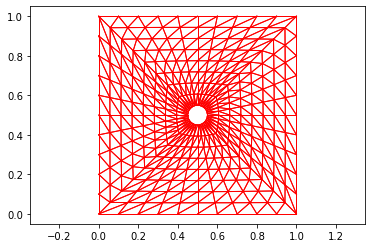

In [715]:
NL, EL = void_mesh(d1,d2,p,m,R,element_type)

x0, y0 = NL[EL[:,0]-1,0], NL[EL[:,0]-1,1]
x1, y1 = NL[EL[:,1]-1,0], NL[EL[:,1]-1,1]
x2, y2 = NL[EL[:,2]-1,0], NL[EL[:,2]-1,1]
plt.axis('equal')
#for i in range(len(NL)):
 #    plt.annotate(i,xy = (NL[i,0],NL[i,1]))
plt.plot(np.array([x0,x1]),np.array([y0,y1]),'red',linewidth=1);
plt.plot(np.array([x1,x2]),np.array([y1,y2]),'red',linewidth=1);
plt.plot(np.array([x2,x0]),np.array([y2,y0]),'red',linewidth=1);

EL = np.delete(EL,3,1)
EL = EL - np.ones((EL.shape[0],EL.shape[1]))
EL = EL.astype(int)


In [716]:
q = 1
eff = np.zeros((len(NL),2))
for i in range(len(NL)):
    if NL[i,0] == 0:
        if NL[i,1] == 0 or NL[i,1] == d1:
            eff[i,0] = -d1*q/p/2
        else: eff[i,0] = -d1*q/p
    elif NL[i,0] == d2:
        if NL[i,1] == 0 or NL[i,1] == d1:
            eff[i,0] = d1*q/p/2
        else: eff[i,0] = d1*q/p       


In [717]:

D = E/(1 - mu*mu)*np.array([[1,mu,0],[mu,1,0],[0,0, (1-mu)/2]])

In [718]:
def K_ok(A,lim):
    for i in range(int(len(lim)/2)):
        if lim[2*i] ==0 and lim[2*i+1] == 0:
            A[2*i:2*i+1,:]=A[2*i:2*i+1,:]*0
            A[:,2*i:2*i+1]=A[:,2*i:2*i+1]*0
            A[2*i,2*i] = 1
            A[2*i+1,2*i+1] = 1
    return A

In [719]:
#функция которой дают номера узлов, соответствующих элементу,
# и матрицу с координатами, а она считает определитель*2
def Det2(xi,yi,xj,yj,xk,yk):
    return (xj*(yk - yi) + xi*(yj - yk) + xk*(yi - yj))

In [720]:
def make_B(num,el_nod,Coord_nod,D):
    x,y,z = sp.symbols('x, y, z')
    ui,uj,uk = sp.var('ui uj uk')
    vi,vj,vk = sp.var('vi vj vk')
    wi,wj,wk = sp.var('wi wj wk')
    n = el_nod[num,0]
    m = el_nod[num,1]
    t = el_nod[num,2]
    # для конкретного элемента ищем координаты узлов
    xi = Coord_nod[n,0]
    yi = Coord_nod[n,1]
    xj = Coord_nod[m,0]
    yj = Coord_nod[m,1]
    xk = Coord_nod[t,0]
    yk = Coord_nod[t,1]
    # пользуемся формулами со слайда 29
    Det = Det2(xi,yi,xj,yj,xk,yk)
    ai = (xj*yk - xk*yj)/Det
    aj = (xk*yi - xi*yk)/Det
    ak = (xi*yj - xj*yi)/Det
    bi = (yj - yk)/Det
    bj = (yk - yi)/Det
    bk = (yi - yj)/Det
    ci = (xk - xj)/Det
    cj = (xi - xk)/Det
    ck = (xj - xi)/Det
    
    # собираем матрицу B
    Bi =[[bi, 0],[0, ci],[ci, bi]]
    Bj =[[bj, 0],[0, cj],[cj, bj]] 
    Bk =[[bk, 0],[0, ck],[ck, bk]] 
    B0 = np.hstack([Bi, Bj, Bk])
    
    return B0

In [721]:
def make_K(num,el_nod,Coord_nod,D):
    Bi = make_B(num,el_nod,Coord_nod,D)
    n = el_nod[num,0]
    m = el_nod[num,1]
    t = el_nod[num,2]
    xi = Coord_nod[n,0]
    yi = Coord_nod[n,1]
    xj = Coord_nod[m,0]
    yj = Coord_nod[m,1]
    xk = Coord_nod[t,0]
    yk = Coord_nod[t,1]
    return (Det2(xi,yi,xj,yj,xk,yk)/2)*Bi.T.dot(D).dot(Bi)

In [722]:
# глобальная K 
def sum_K(A,B,ind,num):
    for i in range(len(ind)):
        for j in range(len(ind)):
            ii = ind[i]
            jj = ind[j]
            A[ii*2:ii*2+2,jj*2:jj*2+2] += B[i*2:i*2+2,j*2:j*2+2]
    return A

In [723]:
def right(eff,num_nod):
    a = np.zeros(num_nod*2)
    for i in range(len(eff)):
            a[i*2] = eff[i,0]
            a[i*2+1] = eff[i,1]
            
    return a

In [724]:
def FEM(el_nod,Coord_nod,D,eff,Num_nod,Num_el):
    rig = right(eff,Num_nod)
    K0 = np.zeros((Num_nod*2,Num_nod*2))
    for i in range(0,Num_el):
        ind = el_nod[i,:]
        
        K0 = sum_K(K0,make_K(i,el_nod,Coord_nod,D),ind,i)
    #K0 = K_ok(K0,rig)
    
    U = np.linalg.solve(K0,rig.T)
    #U = Gauss(K0,np.array([rig]).T)
    #достать перемещения можно где-то здесь
    max_sig = 0
    max_sig_i = -1
    m_s=0
    m_s_i=-1
    lnap = np.matrix([-1,-1,-1])
    for i in range(Num_el):
        B = make_B(i,el_nod,Coord_nod,D)
        Ui = np.zeros((6))
        Ui[0] = U[el_nod[i,0]*2]
        Ui[1] = U[el_nod[i,0]*2+1]
        Ui[2] = U[el_nod[i,1]*2]
        Ui[3] = U[el_nod[i,1]*2+1]  
        Ui[4] = U[el_nod[i,2]*2]
        Ui[5] = U[el_nod[i,2]*2+1] 
        #деформации (эпсилон)    
        Eps = B.dot(Ui)
        
        # напряжения(сигма)
        Nap = D.dot(Eps) 
        lnap = np.append(lnap,[[Nap[0],Nap[1],Nap[2]]],axis=0)
        NapM = np.matrix([[Nap[0],Nap[2]],[Nap[2],Nap[1]]])
        
        Sig,s = np.linalg.eig(NapM) 
        
        now_sig = ma.sqrt(Nap[0]**2-Nap[0]*Nap[1]+Nap[1]**2+3*Nap[2]**2)
        #print(now_sig,el_nod[i,:],Ui)
        if now_sig > max_sig:
            max_sig = now_sig
            max_sig_i = i
       
    print("sigmamax = ",max_sig)
    a = Coord_nod[el_nod[max_sig_i,0],:]
    b = Coord_nod[el_nod[max_sig_i,1],:]
    c = Coord_nod[el_nod[max_sig_i,2],:]
    print(a,b,c)
    for i in range(Num_nod):

        plt.plot(Coord_nod[i,0],Coord_nod[i,1],'b.')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(b[0],b[1],'r.')
    plt.plot(a[0],a[1],'r.')
    plt.plot(c[0],c[1],'r.')
    
    plt.axis('equal')
    lnap = np.delete(lnap,0,axis = 0)
  
    return U


sigmamax =  2.060855567407833
[0.48065599 0.39428864] [0.5  0.45] [0.49217828 0.45061558]


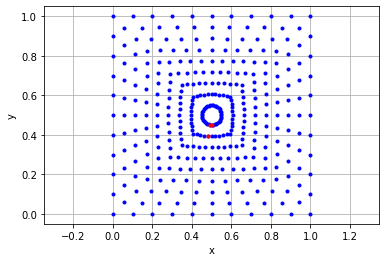

In [725]:
finalU = FEM(EL,NL,D,eff,len(NL),len(EL))


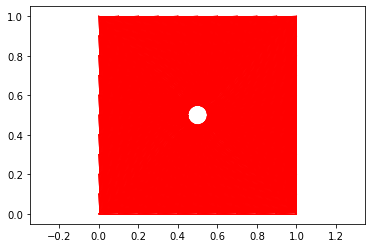

In [726]:
NL1, EL1 = void_mesh(d1,d2,p*p1,m*m1,R,element_type)
#for i in range(len(NL1)):
 #    plt.annotate(i,xy = (NL1[i,0],NL1[i,1]))
x01, y01 = NL1[EL1[:,0]-1,0], NL1[EL1[:,0]-1,1]
x11, y11 = NL1[EL1[:,1]-1,0], NL1[EL1[:,1]-1,1]
x21, y21 = NL1[EL1[:,2]-1,0], NL1[EL1[:,2]-1,1]
plt.axis('equal')
plt.plot(np.array([x01,x11]),np.array([y01,y11]),'red',linewidth=1);
plt.plot(np.array([x11,x21]),np.array([y11,y21]),'red',linewidth=1);
plt.plot(np.array([x21,x01]),np.array([y21,y01]),'red',linewidth=1);
EL1 = np.delete(EL1,3,1)
EL1 = EL1 - np.ones((EL1.shape[0],EL1.shape[1]))
EL1 = EL1.astype(int)

In [727]:
U = np.zeros((len(NL1)*2,1))
for i in range(len(NL1)):
    for j in range(len(NL)-p*8,len(NL)-4*p):
        if abs(NL1[i,0] - NL[j,0])<1/p/1000 and abs(NL1[i,1] - NL[j,1])<1/p/1000:
            U[i*2] = finalU[j*2]
            U[i*2+1] = finalU[j*2+1]
            if j == len(NL)-p*8:
                ikont1 = i
                ikont2 = j

#перезаписываем новую сетку
NLfinal = NL1[ikont1:,:]
for i in range(len(EL1)):
    EL1[i,0] =EL1[i,0]-ikont1+1
    EL1[i,1] = EL1[i,1]-ikont1+1
    EL1[i,2] = EL1[i,2]-ikont1+1
ELfinal = np.zeros((1,3))
U = U[ikont1*2:]
for i in range(len(EL1)):
    if EL1[i,0] > 0 and EL1[i,1] > 0 and EL1[i,2] > 0:
        ELfinal = np.append(ELfinal,[EL1[i,:]],axis = 0)
ELfinal = np.delete(ELfinal,0,axis=0)
#for i in range(len(NLfinal)):
 #   plt.plot(NLfinal[i,0],NLfinal[i,1],'b.')
ELfinal = ELfinal.astype(int)

In [728]:
#for i in range(len(NL)-p*4):
 #   if abs(NLfinal[0,0] - NL[i,0])<1/p/100000 and abs(NLfinal[0,1] - NL[i,1])<1/p/100000:
  #      ikont = i

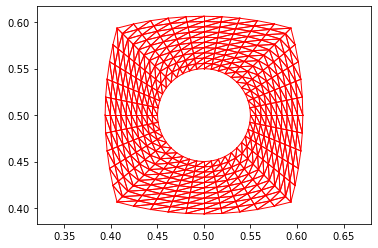

In [729]:
x01, y01 = NLfinal[ELfinal[:,0]-1,0], NLfinal[ELfinal[:,0]-1,1]
x11, y11 = NLfinal[ELfinal[:,1]-1,0], NLfinal[ELfinal[:,1]-1,1]
x21, y21 = NLfinal[ELfinal[:,2]-1,0], NLfinal[ELfinal[:,2]-1,1]

plt.axis('equal')
plt.plot(np.array([x01,x11]),np.array([y01,y11]),'red',linewidth=1);
plt.plot(np.array([x11,x21]),np.array([y11,y21]),'red',linewidth=1);
plt.plot(np.array([x21,x01]),np.array([y21,y01]),'red',linewidth=1);

In [730]:
ELfinal = ELfinal - np.ones((ELfinal.shape[0],ELfinal.shape[1]))
ELfinal = ELfinal.astype(int)
ln = len(NLfinal)
le = len(ELfinal)
K0 = np.zeros((ln*2,ln*2))
for i in range(0,le):
    ind = ELfinal[i,:]
    K0 = sum_K(K0,make_K(i,ELfinal,NLfinal,D),ind,i)


In [731]:
rig = np.zeros((1,ln*2)) #нулевой вектор правой части
rig1 = K0.dot(U) #вектор правой части после умножения на вектор известных премещений
for i in range(2*ln): #учёт нулей
    if abs(U[i])>0:
        K0[i,:] = K0[i,:]*0
        K0[:,i] = K0[:,i]*0
        K0[i,i] = 1
        rig1[i] = 0
Ufin = np.linalg.solve(K0,-rig1)
for i in range(len(U)):
    print(U[i],Ufin[i])
Ufin = Ufin+U

[-9.07084461e-12] [0.]
[1.58674432e-11] [0.]
[-9.18679401e-12] [0.]
[1.5009694e-11] [0.]
[-9.25503513e-12] [0.]
[1.41224328e-11] [0.]
[-9.27377062e-12] [0.]
[1.32101897e-11] [0.]
[-9.24244269e-12] [0.]
[1.22757135e-11] [0.]
[-9.16019767e-12] [0.]
[1.13208521e-11] [0.]
[-9.02493416e-12] [0.]
[1.03500994e-11] [0.]
[-8.83511868e-12] [0.]
[9.37376851e-12] [0.]
[-8.59259395e-12] [0.]
[8.40625984e-12] [0.]
[-8.30274186e-12] [0.]
[7.461436e-12] [0.]
[-7.97267775e-12] [0.]
[6.55001437e-12] [0.]
[-7.03262793e-12] [0.]
[6.28950525e-12] [0.]
[-6.06402226e-12] [0.]
[6.07478615e-12] [0.]
[-5.07837755e-12] [0.]
[5.91232027e-12] [0.]
[-4.08988241e-12] [0.]
[5.80658496e-12] [0.]
[-3.11373244e-12] [0.]
[5.75842048e-12] [0.]
[-2.16214205e-12] [0.]
[5.76443925e-12] [0.]
[-1.24107206e-12] [0.]
[5.81932213e-12] [0.]
[-3.51647444e-13] [0.]
[5.91897538e-12] [0.]
[5.05715362e-13] [0.]
[6.06102796e-12] [0.]
[1.32894412e-12] [0.]
[6.24324983e-12] [0.]
[1.44489352e-12] [0.]
[7.10099908e-12] [0.]
[1.51313463e-12]

[0.] [-6.67666354e-12]
[0.] [9.58850592e-12]
[0.] [-6.39400697e-12]
[0.] [9.04208451e-12]
[0.] [-6.06705255e-12]
[0.] [8.53171815e-12]
[0.] [-5.51827548e-12]
[0.] [8.25453662e-12]
[0.] [-4.94014657e-12]
[0.] [8.03022923e-12]
[0.] [-4.34717743e-12]
[0.] [7.86487482e-12]
[0.] [-3.75499957e-12]
[0.] [7.76164083e-12]
[0.] [-3.17862824e-12]
[0.] [7.72059092e-12]
[0.] [-2.63029099e-12]
[0.] [7.7390224e-12]
[0.] [-2.11772974e-12]
[0.] [7.81241657e-12]
[0.] [-1.64415307e-12]
[0.] [7.93579208e-12]
[0.] [-1.20984739e-12]
[0.] [8.10486218e-12]
[0.] [-8.14421601e-13]
[0.] [8.31642688e-12]
[0.] [-6.52204105e-13]
[0.] [8.75377025e-12]
[0.] [-5.4154319e-13]
[0.] [9.22500324e-12]
[0.] [-4.85119509e-13]
[0.] [9.72689941e-12]
[0.] [-4.85044231e-13]
[0.] [1.02562564e-11]
[0.] [-5.42847318e-13]
[0.] [1.08088709e-11]
[0.] [-6.59328813e-13]
[0.] [1.13780929e-11]
[0.] [-8.34168796e-13]
[0.] [1.19536977e-11]
[0.] [-1.06523695e-12]
[0.] [1.25221871e-11]
[0.] [-1.34789352e-12]
[0.] [1.30686085e-11]
[0.] [-1.674

In [732]:
#for i in range(len(Ufin)):
 #   print(Ufin[i],finalU[ikont1*2+i])

Тут надо склеить узлы и элементы двух решений. 

In [733]:

ss = set()
ss1 = set()
for i in range(len(NL)-p*8,len(NL)-4*p):
    for j in range(ln):
        if abs(NLfinal[j,0] - NL[i,0])<1/p/1000 and abs(NLfinal[j,1] - NL[i,1])<1/p/1000:
            ss.add(j)
            ss1.add(i)
ss = list(ss)
ss1 = list(ss1)
if p1 == 1: 
    ss2 = list(range(0,(max(ss)+1)*2))
else:
    ss2 = ss+list(np.array(ss)+1)
ss2.sort()
print(ss2)


Ufin = np.delete(Ufin,ss2,axis=0)
NLfinal = np.delete(NLfinal,ss,axis=0)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]


In [734]:
print(len(Ufin),len(NLfinal))

800 400


In [735]:
for j in range(len(ELfinal)):
    for k in range(3):      
        kk = True 
        for i in range(len(ss)):
            if ELfinal[j,k] == ss[i]: 
                ELfinal[j,k] = ss1[i]                
                kk = False #узел дублировлся в сетках, ему присваивается номер из глобальной
                break
        if kk:
            if ELfinal[j,k] < max(ss): #узел не дублируется, но лежит на границе
                ELfinal[j,k] = ikont2 +p*4 - ELfinal[j,k]//p1 -1 +ELfinal[j,k]
            else: ELfinal[j,k] = ikont2 + ELfinal[j,k] #узел внутри локальной области

NLans = np.vstack([NL[:-p*4], NLfinal])
ELans = np.vstack([EL[:-p*8], ELfinal])
Uans = np.vstack([np.array([finalU[:-p*8]]).T, Ufin]) #+1
ELans = ELans + np.ones((ELans.shape[0],ELans.shape[1]))
ELans = ELans.astype(int)
         
        

In [736]:
print(len(NLans),len(Uans))

720 1440


In [737]:
#for i in range(len(Uans)):
 #   print(i,Uans[i][0], finalU[i])

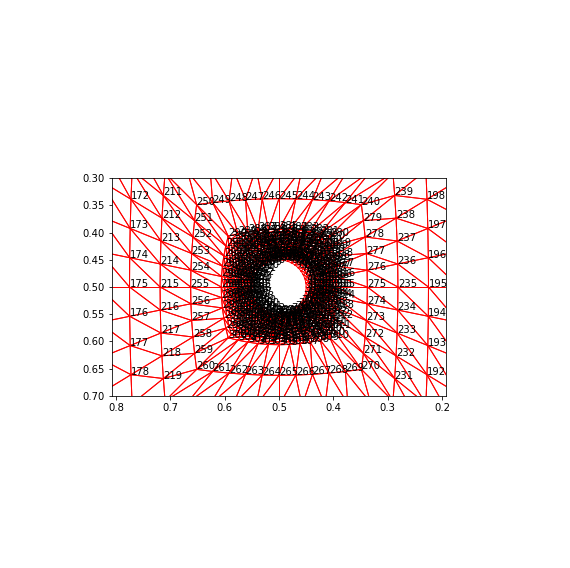

In [738]:
x01, y01 = NLans[ELans[:,0]-1,0], NLans[ELans[:,0]-1,1]
x11, y11 = NLans[ELans[:,1]-1,0], NLans[ELans[:,1]-1,1]
x21, y21 = NLans[ELans[:,2]-1,0], NLans[ELans[:,2]-1,1]
plt.axis('equal')
for i in range(len(NLans)):
     plt.annotate(i,xy = (NLans[i,0],NLans[i,1]))
plt.xlim([0.7, 0.3])
plt.ylim([0.7, 0.3])
plt.plot(np.array([x01,x11]),np.array([y01,y11]),'red',linewidth=1);
plt.plot(np.array([x11,x21]),np.array([y11,y21]),'red',linewidth=1);
plt.plot(np.array([x21,x01]),np.array([y21,y01]),'red',linewidth=1);
ELans = ELans - np.ones((ELans.shape[0],ELans.shape[1]))
ELans = ELans.astype(int)


1.0009973069441933 [ 0  1 41] [-3.12725005e-11  3.66832362e-11 -3.07720199e-11  3.17218908e-11
 -2.76901074e-11  2.93371855e-11]
1.0017821253489136 [ 0 41 40] [-3.12725005e-11  3.66832362e-11 -2.76901074e-11  2.93371855e-11
 -2.81006031e-11  3.37145184e-11]
1.0018038145532653 [ 1  2 42] [-3.07720199e-11  3.17218908e-11 -3.02711953e-11  2.67611960e-11
 -2.72724377e-11  2.49559578e-11]
1.0033446274354456 [ 1 42 41] [-3.07720199e-11  3.17218908e-11 -2.72724377e-11  2.49559578e-11
 -2.76901074e-11  2.93371855e-11]
0.9985438057014409 [ 2  3 43] [-3.02711953e-11  2.67611960e-11 -2.97721388e-11  2.18006784e-11
 -2.68484875e-11  2.05711616e-11]
1.0014748839779872 [ 2 43 42] [-3.02711953e-11  2.67611960e-11 -2.68484875e-11  2.05711616e-11
 -2.72724377e-11  2.49559578e-11]
0.9888912890235608 [ 3  4 44] [-2.97721388e-11  2.18006784e-11 -2.92779422e-11  1.68360476e-11
 -2.64196579e-11  1.61799505e-11]
0.9951454877737136 [ 3 44 43] [-2.97721388e-11  2.18006784e-11 -2.64196579e-11  1.61799505e-11
 -

1.0021474930582903 [ 97 138 137] [ 5.80647238e-12 -8.44145580e-12  7.60404120e-12 -5.63528575e-12
  4.38160880e-12 -5.59250787e-12]
1.0094805018780715 [ 98  99 139] [ 9.60713304e-12 -8.51790611e-12  1.34007744e-11 -8.58237104e-12
  1.08154666e-11 -5.65898939e-12]
1.008536346815173 [ 98 139 138] [ 9.60713304e-12 -8.51790611e-12  1.08154666e-11 -5.65898939e-12
  7.60404120e-12 -5.63528575e-12]
1.0080426374733538 [ 99 100 140] [ 1.34007744e-11 -8.58237104e-12  1.71869186e-11 -8.63461409e-12
  1.40144354e-11 -5.66363358e-12]
1.0082427420101399 [ 99 140 139] [ 1.34007744e-11 -8.58237104e-12  1.40144354e-11 -5.66363358e-12
  1.08154666e-11 -5.65898939e-12]
1.0070781472720667 [100 101 141] [ 1.71869186e-11 -8.63461409e-12  1.68654360e-11 -4.84104210e-12
  1.37811548e-11 -2.45412028e-12]
1.0137314741362828 [100 141 140] [ 1.71869186e-11 -8.63461409e-12  1.37811548e-11 -2.45412028e-12
  1.40144354e-11 -5.66363358e-12]
1.0096632330124873 [101 102 142] [ 1.68654360e-11 -4.84104210e-12  1.65297044

 3.06189990e-12 3.13002115e-12]
1.0546563238432056 [218 259 258] [3.60084800e-12 1.39685655e-13 3.06189990e-12 3.13002115e-12
 1.61014981e-12 3.03030261e-12]
1.0481790485602602 [219 220 260] [5.64323400e-12 1.97713146e-13 7.66489024e-12 2.87094712e-13
 4.49053296e-12 3.26625032e-12]
1.070782896866588 [219 260 259] [5.64323400e-12 1.97713146e-13 4.49053296e-12 3.26625032e-12
 3.06189990e-12 3.13002115e-12]
1.0470802437646303 [220 221 261] [7.66489024e-12 2.87094712e-13 7.60751676e-12 2.32509493e-12
 4.52092699e-12 4.71548907e-12]
1.08537491452493 [220 261 260] [7.66489024e-12 2.87094712e-13 4.52092699e-12 4.71548907e-12
 4.49053296e-12 3.26625032e-12]
1.0509190871406926 [221 222 262] [7.60751676e-12 2.32509493e-12 7.51581025e-12 4.38316293e-12
 4.51034902e-12 6.18904587e-12]
1.0937375669121385 [221 262 261] [7.60751676e-12 2.32509493e-12 4.51034902e-12 6.18904587e-12
 4.52092699e-12 4.71548907e-12]
1.0449161992105374 [222 223 263] [7.51581025e-12 4.38316293e-12 7.38894054e-12 6.45805616

1.1864316678632014 [327 328 368] [-8.56398092e-12  9.48380515e-12 -8.32379742e-12  8.57253603e-12
 -8.05405019e-12  8.73939482e-12]
1.2136155719682469 [327 368 367] [-8.56398092e-12  9.48380515e-12 -8.05405019e-12  8.73939482e-12
 -8.29182330e-12  9.59443910e-12]
1.2114076865786656 [328 329 369] [-8.32379742e-12  8.57253603e-12 -8.03510692e-12  7.68473825e-12
 -7.76683700e-12  7.90827189e-12]
1.2381897142371296 [328 369 368] [-8.32379742e-12  8.57253603e-12 -7.76683700e-12  7.90827189e-12
 -8.05405019e-12  8.73939482e-12]
1.1953404305838204 [329 330 370] [-8.03510692e-12  7.68473825e-12 -7.70583677e-12  6.83196506e-12
 -7.43853285e-12  7.11327842e-12]
1.222273483368032 [329 370 369] [-8.03510692e-12  7.68473825e-12 -7.43853285e-12  7.11327842e-12
 -7.76683700e-12  7.90827189e-12]
1.0989408604102262 [330 331 371] [-7.70583677e-12  6.83196506e-12 -6.82294286e-12  6.56737390e-12
 -6.61206136e-12  6.84561455e-12]
1.2308683551463218 [330 371 370] [-7.70583677e-12  6.83196506e-12 -6.61206136

0.5321205288423678 [453 454 494] [-4.67356487e-12  7.01970829e-12 -3.90866595e-12  6.91889584e-12
 -3.85931323e-12  7.19871755e-12]
0.6443738189744543 [453 494 493] [-4.67356487e-12  7.01970829e-12 -3.85931323e-12  7.19871755e-12
 -4.56740202e-12  7.29950658e-12]
0.322200403584757 [454 455 495] [-3.90866595e-12  6.91889584e-12 -3.15995787e-12  6.87997107e-12
 -3.16778065e-12  7.16019007e-12]
0.36648439036260605 [454 495 494] [-3.90866595e-12  6.91889584e-12 -3.16778065e-12  7.16019007e-12
 -3.85931323e-12  7.19871755e-12]
0.35128047932095374 [455 456 496] [-3.15995787e-12  6.87997107e-12 -2.44038370e-12  6.89818807e-12
 -2.50565318e-12  7.17959955e-12]
0.3238647054923401 [455 496 495] [-3.15995787e-12  6.87997107e-12 -2.50565318e-12  7.17959955e-12
 -3.16778065e-12  7.16019007e-12]
0.6148764842683675 [456 457 497] [-2.44038370e-12  6.89818807e-12 -1.75601798e-12  6.96691647e-12
 -1.87942081e-12  7.25073608e-12]
0.5629325060015548 [456 497 496] [-2.44038370e-12  6.89818807e-12 -1.879420

1.1762055827264357 [559 560 599] [-6.76647931e-12  1.42923008e-11 -6.92747889e-12  1.37942662e-11
 -6.53205310e-12  1.40058309e-11]
1.2316115523103475 [560 561 601] [-6.92747889e-12  1.37942662e-11 -7.08969639e-12  1.33569228e-11
 -6.80669605e-12  1.31283908e-11]
1.3019598667326033 [560 601 600] [-6.92747889e-12  1.37942662e-11 -6.80669605e-12  1.31283908e-11
 -6.63953928e-12  1.35075764e-11]
1.3297318491486372 [561 562 602] [-7.08969639e-12  1.33569228e-11 -7.20035730e-12  1.28856898e-11
 -6.92095776e-12  1.27134400e-11]
1.4079532613100612 [561 602 601] [-7.08969639e-12  1.33569228e-11 -6.92095776e-12  1.27134400e-11
 -6.80669605e-12  1.31283908e-11]
1.4182416350229714 [562 563 603] [-7.20035730e-12  1.28856898e-11 -7.25678098e-12  1.23837936e-11
 -6.97909463e-12  1.22666180e-11]
1.524276850021594 [562 603 602] [-7.20035730e-12  1.28856898e-11 -6.97909463e-12  1.22666180e-11
 -6.92095776e-12  1.27134400e-11]
1.4857000574522512 [563 564 604] [-7.25678098e-12  1.23837936e-11 -7.25685626

 -1.45564135e-12  9.42237898e-12]
1.7721956976892286 [662 663 703] [-1.09048296e-12  9.56809039e-12 -1.03360447e-12  9.96261415e-12
 -1.29310349e-12  1.00848079e-11]
2.173208002522651 [662 703 702] [-1.09048296e-12  9.56809039e-12 -1.29310349e-12  1.00848079e-11
 -1.34317057e-12  9.73775912e-12]
2.003907815004076 [663 664 704] [-1.03360447e-12  9.96261415e-12 -1.03765684e-12  1.03835982e-11
 -1.30657546e-12  1.04553859e-11]
2.5021885364099825 [663 704 703] [-1.03360447e-12  9.96261415e-12 -1.30657546e-12  1.04553859e-11
 -1.29310349e-12  1.00848079e-11]
2.1299269539813217 [664 665 705] [-1.03765684e-12  1.03835982e-11 -1.10325314e-12  1.08238877e-11
 -1.38336296e-12  1.08408780e-11]
2.691323997349743 [664 705 704] [-1.03765684e-12  1.03835982e-11 -1.38336296e-12  1.08408780e-11
 -1.30657546e-12  1.04553859e-11]
2.1227956154927696 [665 666 706] [-1.10325314e-12  1.08238877e-11 -1.22932288e-12  1.12752322e-11
 -1.52168167e-12  1.12322095e-11]
2.7124371123399627 [665 706 705] [-1.10325314

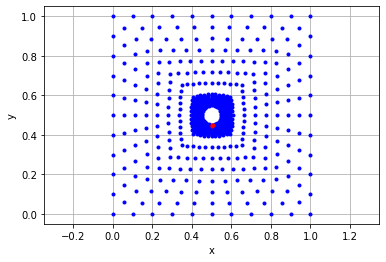

In [739]:

lnap = np.matrix([-1,-1,-1])
max_sig = 0
max_sig_i = -1
m_s=0
m_s_i=-1
Num_el = len(ELans)
for i in range(Num_el):
    B = make_B(i,ELans,NLans,D)
    Ui = np.zeros((6))
    Ui[0] = Uans[ELans[i,0]*2]
    Ui[1] = Uans[ELans[i,0]*2+1]
    Ui[2] = Uans[ELans[i,1]*2]
    Ui[3] = Uans[ELans[i,1]*2+1]  
    Ui[4] = Uans[ELans[i,2]*2]
    Ui[5] = Uans[ELans[i,2]*2+1] 
        #деформации (эпсилон)    
    Eps = B.dot(Ui)
        
        # напряжения(сигма)
    Nap = D.dot(Eps) 
    lnap = np.append(lnap,[[Nap[0],Nap[1],Nap[2]]],axis=0)
    NapM = np.matrix([[Nap[0],Nap[2]],[Nap[2],Nap[1]]])
        
    Sig,s = np.linalg.eig(NapM)         
    now_sig = ma.sqrt(Nap[0]**2-Nap[0]*Nap[1]+Nap[1]**2+3*Nap[2]**2)
    print(now_sig,ELans[i,:],Ui)
    if now_sig > max_sig:
        max_sig = now_sig
        max_sig_i = i
print("sigmamax = ",max_sig)
a = NLans[ELans[max_sig_i,0],:]
b = NLans[ELans[max_sig_i,1],:]
c = NLans[ELans[max_sig_i,2],:]
print(a,b,c)
for i in range(len(NLans)):

    plt.plot(NLans[i,0],NLans[i,1],'b.')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(b[0],b[1],'r.')
plt.plot(a[0],a[1],'r.')
plt.plot(c[0],c[1],'r.')
plt.axis('equal')
lnap = np.delete(lnap,0,axis = 0)